In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers, losses, regularizers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pydot


In [ ]:
dataset = pd.read_csv('/content/root2ai - Data.csv')

dataset

Text      Target
0      reserve bank forming expert committee based in...  Blockchain
1              director could play role financial system  Blockchain
2      preliminary discuss secure transaction study r...  Blockchain
3      security indeed prove essential transforming f...  Blockchain
4      bank settlement normally take three days based...  Blockchain
...                                                  ...         ...
22699  fourth study discusses blockchain technology e...    Reg Tech
22700  book finishes stating biggest issue emerging F...    Reg Tech
22701                                people culture cess    Reg Tech
22702  author challenges execu tive lead change stop ...    Reg Tech
22703  change data driven culture come bottom must start    Reg Tech

[22704 rows x 2 columns]

In [ ]:
dataset.dropna(axis=0, how = 'any', inplace=True)
dataset['Num_Words_Text'] = dataset['Text'].apply(lambda x:len(str(x).split()))
mask = dataset['Num_Words_Text'] > 2
dataset = dataset[mask]

print("       Trained Data:       ")
print(dataset['Target'].value_counts())
print(len(dataset))

       Trained Data:       
FinTech             7854
Cyber Security      2338
Reg Tech            1905
credit reporting    1600
Bigdata             1419
Blockchain          1296
Neobanks             935
Microservices        920
Stock Trading        728
Robo Advising        666
Data Security        336
Name: Target, dtype: int64
19997


In [ ]:
dataset.dropna(axis=0, how = 'any', inplace=True)
dataset['Num_Words_Text'] = dataset['Text'].apply(lambda x:len(str(x).split()))
mask = dataset['Num_Words_Text'] > 2
dataset = dataset[mask]

print("       Tested Data:      ")
print(dataset['Target'].value_counts())
print(len(dataset))

       Tested Data:      
FinTech             7854
Cyber Security      2338
Reg Tech            1905
credit reporting    1600
Bigdata             1419
Blockchain          1296
Neobanks             935
Microservices        920
Stock Trading        728
Robo Advising        666
Data Security        336
Name: Target, dtype: int64
19997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import collections
x_train,x_test,y_train,y_test = train_test_split(dataset['Text'].tolist(), dataset['Target'].tolist(), test_size = 0.33,stratify = dataset['Target'].tolist(), random_state=0)

print("Trained data length:"+str(len(x_train)))
print('Class Distribution: '+str(collections.Counter(y_train)))
print('Tested Data length: '+str(len(x_test)))
print('Class Distribution: '+str(len(y_test)))

x_train=np.asarray(x_train)
x_test = np.asarray(dataset['Text'].tolist())

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray(tf.keras.utils.to_categorical(train_labels))

test_labels = le.transform(dataset['Target'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)

train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))



Trained data length:13397
Class Distribution: Counter({'FinTech': 5262, 'Cyber Security': 1566, 'Reg Tech': 1276, 'credit reporting': 1072, 'Bigdata': 951, 'Blockchain': 868, 'Neobanks': 627, 'Microservices': 616, 'Stock Trading': 488, 'Robo Advising': 446, 'Data Security': 225})
Tested Data length: 6600
Class Distribution: 6600


In [ ]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['FinTech', 'Blockchain', 'FinTech', 'Bigdata', 'FinTech', 'Reg Tech', 'Robo Advising', 'Stock Trading', 'Cyber Security', 'Data Security']
Text to number
[4 1 4 0 4 7 8 9 2 3]
Number to category
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==5:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==5:
        break
       

Streaming output truncated to the last 5000 lines.
tf.Tensor(b'Such include private financial supporting banking mobile account management federal side creation Consumer Financial Protection Bureau gave resource could utilize prevent financial abuse predatory financial unfair deceptive abusive', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(11,), dtype=float32)
tf.Tensor(b'This shift banking regulatory even evolution generosity towards world access financial', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(11,), dtype=float32)
tf.Tensor(b'While idea fair equal opportunity everyone invest acquire wealth long recently begun stepping lower barrier entry average consumer become familiar investment realm', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(11,), dtype=float32)
tf.Tensor(b'large small made recently attract younger traditionally account surplus capital invest needs', shape=(), dtype=string)

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],dtype=tf.string, trainable=True)

In [ ]:
print(x_train[:1])
hub_layer(x_train[:1])

['invest design start twentieth century marketing perspective making people want twenty first century approach making people want']


<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.2628795 , -1.1306887 ,  2.0015814 ,  0.03356744, -1.0929201 ,
        -1.4984206 , -0.48088756, -0.7908478 , -0.7329832 , -1.1440185 ,
         0.6558467 ,  0.5927809 , -1.2245799 ,  0.31163138, -3.068905  ,
        -0.33676344,  2.409096  , -0.95935345, -1.0779337 , -0.78592455]],
      dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(11,activation='sigmoid'))

model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                389380    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 11)                121       
Total params: 389,711
Trainable params: 389,711
Non-trainable params: 0
_________________________________________________________________


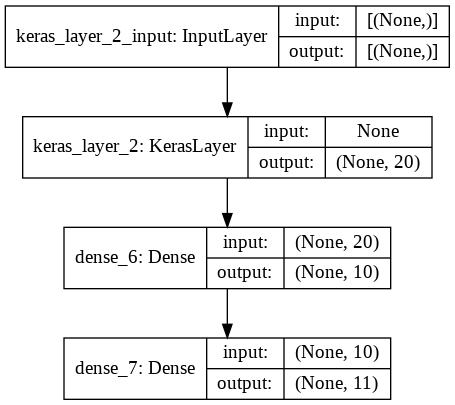

In [ ]:
tf.keras.utils.plot_model(model, "simpleNN_model.png", show_shapes=True)

In [ ]:
epochs = 100

# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=test_ds.batch(128),
                    verbose=1)

Epoch 1/100
105/105 [==============================] - 2s 12ms/step - loss: 2.2713 - categorical_accuracy: 0.3556 - val_loss: 1.9786 - val_categorical_accuracy: 0.3971
Epoch 2/100
105/105 [==============================] - 1s 10ms/step - loss: 1.9258 - categorical_accuracy: 0.4141 - val_loss: 1.8203 - val_categorical_accuracy: 0.4384
Epoch 3/100
105/105 [==============================] - 1s 10ms/step - loss: 1.7770 - categorical_accuracy: 0.4505 - val_loss: 1.7123 - val_categorical_accuracy: 0.4635
Epoch 4/100
105/105 [==============================] - 1s 10ms/step - loss: 1.6766 - categorical_accuracy: 0.4772 - val_loss: 1.6138 - val_categorical_accuracy: 0.4972
Epoch 5/100
105/105 [==============================] - 1s 10ms/step - loss: 1.5740 - categorical_accuracy: 0.5077 - val_loss: 1.5170 - val_categorical_accuracy: 0.5304
Epoch 6/100
105/105 [==============================] - 1s 10ms/step - loss: 1.4681 - categorical_accuracy: 0.5485 - val_loss: 1.4249 - val_categorical_accuracy:

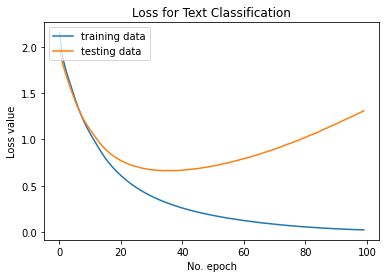

In [ ]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='testing data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

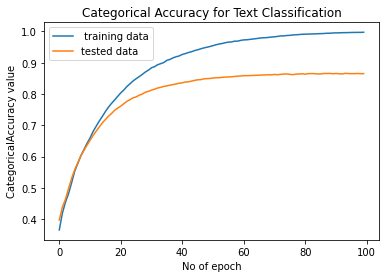

In [ ]:
plt.plot(history.history['categorical_accuracy'], label=' training data')
plt.plot(history.history['val_categorical_accuracy'], label='tested data')
plt.title('Categorical Accuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No of epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(11,activation='sigmoid',kernel_regularizer=regularizers.l2(0.05)))

model1.summary()
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["categorical_accuracy"])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                389380    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                121       
Total params: 389,711
Trainable params: 389,711
Non-trainable params: 0
_________________________________________________________________


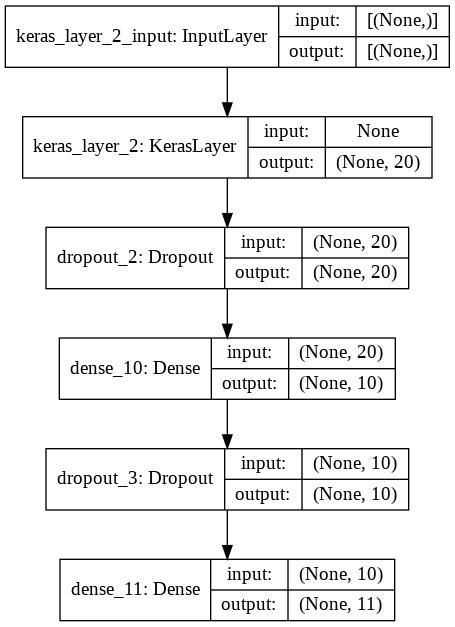

In [ ]:
tf.keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
epochs = 100

# Fit the model using the train and test datasets.
history1 = model1.fit(train_ds.shuffle(1000).batch(128),
                    epochs= epochs ,
                    validation_data=test_ds.batch(128),
                    verbose=1)

Epoch 1/100
105/105 [==============================] - 2s 12ms/step - loss: 4.0675 - categorical_accuracy: 0.2440 - val_loss: 2.9267 - val_categorical_accuracy: 0.3898
Epoch 2/100
105/105 [==============================] - 1s 13ms/step - loss: 3.0241 - categorical_accuracy: 0.3415 - val_loss: 2.5785 - val_categorical_accuracy: 0.3927
Epoch 3/100
105/105 [==============================] - 1s 10ms/step - loss: 2.5820 - categorical_accuracy: 0.3777 - val_loss: 2.3241 - val_categorical_accuracy: 0.3928
Epoch 4/100
105/105 [==============================] - 1s 10ms/step - loss: 2.3450 - categorical_accuracy: 0.3945 - val_loss: 2.1634 - val_categorical_accuracy: 0.3928
Epoch 5/100
105/105 [==============================] - 1s 10ms/step - loss: 2.1960 - categorical_accuracy: 0.3953 - val_loss: 2.0585 - val_categorical_accuracy: 0.3928
Epoch 6/100
105/105 [==============================] - 1s 10ms/step - loss: 2.1053 - categorical_accuracy: 0.3985 - val_loss: 1.9957 - val_categorical_accuracy:

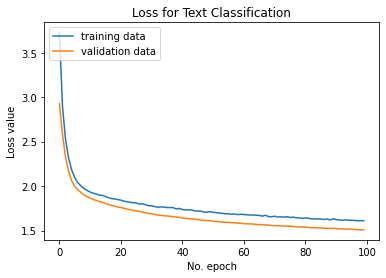

In [ ]:
plt.plot(history1.history['loss'], label='training data')
plt.plot(history1.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

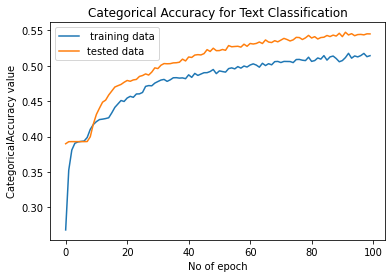

In [ ]:
plt.plot(history1.history['categorical_accuracy'], label=' training data')
plt.plot(history1.history['val_categorical_accuracy'], label='tested data')
plt.title('Categorical Accuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No of epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
print("Evaluate on test data")
results = model1.evaluate(x_test,test_labels)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model1.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
625/625 [==============================] - 1s 1ms/step - loss: 1.5066 - categorical_accuracy: 0.5452
test loss, test acc: [1.506601333618164, 0.5451817512512207]
Generate predictions for all samples
[[0.32745573 0.6444475  0.79454553 ... 0.30597335 0.31085217 0.7315073 ]
 [0.31115693 0.4855672  0.58726335 ... 0.41226876 0.4063853  0.46112585]
 [0.22038957 0.5025676  0.7038124  ... 0.4017169  0.35563892 0.5016575 ]
 ...
 [0.3095836  0.39426303 0.5028762  ... 0.44498682 0.42430204 0.32708   ]
 [0.8064364  0.36167005 0.31339163 ... 0.32599813 0.4487979  0.30407253]
 [0.2895153  0.4135311  0.51604176 ... 0.44790298 0.42536873 0.3526267 ]]


In [ ]:
print(predict_results)

[2 4 4 ... 4 7 4]


In [ ]:
dataset['pred_text'] = predict_results
count = 0
for i in predict_results:
  count+=1
  dataset['pred_text'] = np.where((dataset.pred_text == count),i,dataset.pred_text)
  

In [ ]:
dataset.head()

Text  ... pred_text
0  reserve bank forming expert committee based in...  ...         4
1          director could play role financial system  ...         4
2  preliminary discuss secure transaction study r...  ...         4
3  security indeed prove essential transforming f...  ...         4
4  bank settlement normally take three days based...  ...         4

[5 rows x 4 columns]

In [ ]:
from sklearn.metrics import classification_report
labels = dataset['Target']

dataset['pred_text'] = str(dataset['pred_text'])

print(classification_report(dataset['Target'].tolist(),dataset['pred_text'].tolist(),labels=labels))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockch

In [ ]:
model1.save('D:\tf_model')

INFO:tensorflow:Assets written to: D:	f_model/assets


INFO:tensorflow:Assets written to: D:	f_model/assets


In [ ]:
new_model = tf.keras.models.load_model('D:\tf_model')
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                389380    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                121       
Total params: 389,711
Trainable params: 389,711
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = new_model.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
625/625 [==============================] - 1s 1ms/step - loss: 1.5066 - categorical_accuracy: 0.5452
test loss, test acc: [1.506601333618164, 0.5451817512512207]
Generate predictions for all samples
[[0.32745573 0.6444475  0.79454553 ... 0.30597335 0.31085217 0.7315073 ]
 [0.31115693 0.4855672  0.58726335 ... 0.41226876 0.4063853  0.46112585]
 [0.22038957 0.5025676  0.7038124  ... 0.4017169  0.35563892 0.5016575 ]
 ...
 [0.3095836  0.39426303 0.5028762  ... 0.44498682 0.42430204 0.32708   ]
 [0.8064364  0.36167005 0.31339163 ... 0.32599813 0.4487979  0.30407253]
 [0.2895153  0.4135311  0.51604176 ... 0.44790298 0.42536873 0.3526267 ]]


In [ ]:
dataset['pred_text'] = predict_results
count = 0
for i in predict_results:
  count+=1
  dataset['pred_text'] = np.where((dataset.pred_text == count),i,dataset.pred_text)
  

In [ ]:
from sklearn.metrics import classification_report
labels = dataset['Target']

dataset['pred_text'] = str(dataset['pred_text'])

print(classification_report(dataset['Target'].tolist(),dataset['pred_text'].tolist(),labels=labels))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockchain       0.00      0.00      0.00    1296.0
      Blockch